# Lezione 4 - Librerie (deprecated)

Le librerie sono una collezione di risorse \\
Perchè ci servono? \\


In [ ]:
Stocks = [[7.558, 7.518, 7.61, 7.55, 7.392, 7.555, 7.495, 7.663, 7.612, 7.671, 7.59, 7.627, 7.575, 7.401, 7.42, 7.25, 7.362, 7.431, 7.363, 7.32, 7.465, 7.488, 7.431, 7.442, 7.459],
[7.809, 7.774, 7.666, 7.696, 7.623, 7.75, 7.542, 7.654, 7.609, 7.597, 7.475, 7.607, 7.674, 7.633, 7.413, 6.97, 7.083, 6.969, 6.82, 6.677, 6.855, 6.687, 6.685, 6.484, 6.472],
[163.05, 162.85, 165.4, 161.85, 160.7, 162.6, 161.25, 160.8, 160.05, 162.1, 161.65, 162.35, 160.7, 160.55, 159.9, 154.8, 156.35, 156.45, 157.05, 154.9, 157.2, 156.25, 157.05, 157, 155],
[1.8012, 1.804, 1.7892, 1.7758, 1.7706, 1.7938, 1.7604, 1.7934, 1.8004, 1.776, 1.7768, 1.7706, 1.7546, 1.7404, 1.72, 1.632, 1.6424, 1.6132, 1.608, 1.5806, 1.6242, 1.6124, 1.6054, 1.5854, 1.5858]]

In [ ]:
Stocks_Mean = [sum(st)/len(st) for st in Stocks]
Stocks_Std = [(sum([(st - stm[1])**2 for st in stm[0]])/(len(stm[0])-1))**0.5 for stm in zip(Stocks,Stocks_Mean)]
Correlations = [[sum([(Stocks[i][k]-Stocks_Mean[i])*(Stocks[j][k]-Stocks_Mean[i]) for k in range(len(Stocks[0]))])/(len(Stocks[0])-1)/Stocks_Std[i]/Stocks_Std[j] for i in range(len(Stocks))] for j in range(len(Stocks))]

print("Means: ")
print(*Stocks_Mean)
print("Stds: ")
print(*Stocks_Std)
print("Corrs: ")
print(*Correlations, sep = "\n")

Means: 
7.489920000000001 7.288959999999999 159.514 1.7086640000000002
Stds: 
0.1105893002660444 0.45743063955095964 3.022813259200772 0.08600615714393164
Corrs: 
[1.0, 0.5993757160950618, 0.7351169431061674, 0.7061394458300596]
[0.5993757160950608, 1.0000000000000002, 0.8969716285720989, 0.9736195146995132]
[0.7351169431015653, 0.8969716285711611, 1.0, 0.9260913222446933]
[0.7061394458305099, 0.9736195146994453, 0.926091322250476, 1.0000000000000002]


In [ ]:
import numpy as np
Stocks_Mean = np.mean(Stocks)
Stocks_Std = np.std(Stocks)
Correlations = np.corrcoef(Stocks)

print("Means: ")
print(Stocks_Mean)
print("Stds: ")
print(Stocks_Std)
print("Corrs: ")
print(Correlations)

Means: 
44.000386
Stds: 
66.74900619972858
Corrs: 
[[1.         0.59937572 0.73511694 0.70613945]
 [0.59937572 1.         0.89697163 0.97361951]
 [0.73511694 0.89697163 1.         0.92609132]
 [0.70613945 0.97361951 0.92609132 1.        ]]


In Python sono organizzate tramite **moduli**. \\
Un modulo è un file che contiene codice python: può contenere funzioni, classi e variabili. \\
Come importare un modulo:

In [ ]:
import numpy # L'oggetto "numpy" conterrà il modulo numpy
media = numpy.mean([3,6,2009])
print(media-6)

666.6666666666666


In [ ]:
import numpy as np # L'oggetto "np" conterrà il modulo numpy
media = np.mean([3,6,2009])
print(media-6)

666.6666666666666


In [ ]:
from numpy import mean # Importiamo solo l'elemento "mean" di numpy
media = mean([3,6,2009])
print(media-6)

666.6666666666666


In [ ]:
from numpy import * # Importa tutto (sconsiglio)
media = mean([3,6,2009])
media = std([3,6,2009])
print(media-6)

938.9311556345726


In [ ]:
print(*dir(np),sep="\n")

ALLOW_THREADS
AxisError
BUFSIZE
CLIP
ComplexWarning
DataSource
ERR_CALL
ERR_DEFAULT
ERR_IGNORE
ERR_LOG
ERR_PRINT
ERR_RAISE
ERR_WARN
FLOATING_POINT_SUPPORT
FPE_DIVIDEBYZERO
FPE_INVALID
FPE_OVERFLOW
FPE_UNDERFLOW
False_
Inf
Infinity
MAXDIMS
MAY_SHARE_BOUNDS
MAY_SHARE_EXACT
MachAr
ModuleDeprecationWarning
NAN
NINF
NZERO
NaN
PINF
PZERO
RAISE
RankWarning
SHIFT_DIVIDEBYZERO
SHIFT_INVALID
SHIFT_OVERFLOW
SHIFT_UNDERFLOW
ScalarType
Tester
TooHardError
True_
UFUNC_BUFSIZE_DEFAULT
UFUNC_PYVALS_NAME
VisibleDeprecationWarning
WRAP
_NoValue
_UFUNC_API
__NUMPY_SETUP__
__all__
__builtins__
__cached__
__config__
__doc__
__file__
__git_revision__
__loader__
__name__
__package__
__path__
__spec__
__version__
_add_newdoc_ufunc
_distributor_init
_globals
_mat
_pytesttester
abs
absolute
absolute_import
add
add_docstring
add_newdoc
add_newdoc_ufunc
alen
all
allclose
alltrue
amax
amin
angle
any
append
apply_along_axis
apply_over_axes
arange
arccos
arccosh
arcsin
arcsinh
arctan
arctan2
arctanh
argmax
argmin
ar

# Numpy 


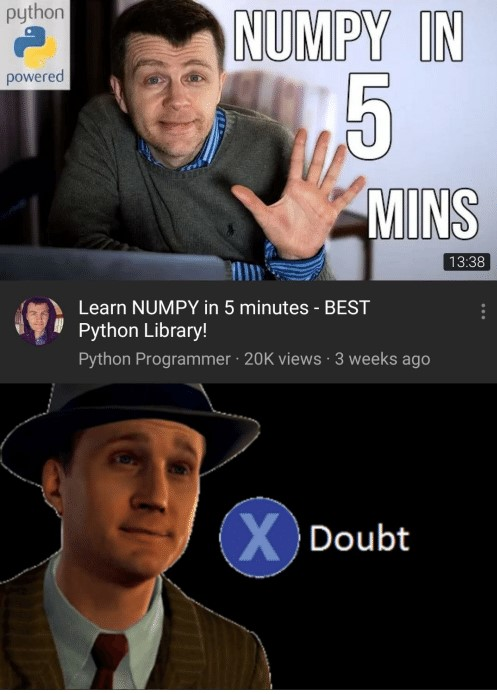

## Basi

In [ ]:
import numpy # L'oggetto "numpy" conterrà il modulo numpy
media = numpy.mean([3,6,2009])
print(media)

672.6666666666666


In [ ]:
import numpy as np # L'oggetto "np" conterrà il modulo numpy
media = np.mean([3,6,2009])
print(media)

672.6666666666666


In [ ]:
from numpy import mean # Importiamo solo l'elemento "mean" di numpy
media = mean([3,6,2009])
print(media)

672.6666666666666


In [ ]:
from numpy import * # Importa tutto (sconsiglio)
media = mean([3,6,2009])
sd = std([3,6,2009])
print(media, sd)

672.6666666666666 944.9311556345726


In [ ]:
data = [1, 2, 3, 4, 5]
print(data)
print(type(data))

[1, 2, 3, 4, 5]
<class 'list'>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
data_np = np.array(data)
print(data_np)
print(type(data_np))
print(type(data_np[0]))

[1 2 3 4 5]
<class 'numpy.ndarray'>
<class 'numpy.int64'>


Diversamente dalle liste, gli array di NumPy devono contenere elementi dello stesso tipo. Se i tipi non sono uguali, viene tentato un upcast.

In [ ]:
data_np2 = np.array(data, dtype= np.float32)
print(data_np2)
print(type(data_np2))
print(type(data_np2[0]))

[1. 2. 3. 4. 5.]
<class 'numpy.ndarray'>
<class 'numpy.float32'>


In [ ]:
np.random.seed(42)

x = np.random.randint(10, size=6)  
x

array([6, 3, 7, 4, 6, 9])

In [ ]:
x[1] # secondo elemento

3

In [ ]:
x[-1]  # ultimo elemento

9

In [ ]:
x[:3]  # primi 3 elementi

array([6, 3, 7])

In [ ]:
x[:-2]  # tutti tranne gli ultimi due

array([6, 3, 7, 4])

In [ ]:
x[1:3]  # dal secondo al terzo (gli intervalli sono sempre del tipo [,) secondo estremo escluso)

array([3, 7])

In [ ]:
np.random.seed(42)

x2 = np.random.random(size=(3,4))  
x2

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985]])

In [ ]:
x2[0, 0] # subset con una tupla

0.3745401188473625

In [ ]:
x2[0, 1] = 1
x2

array([[0.37454012, 1.        , 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985]])

In [ ]:
x2[:2, :3]  # due righe, tre colonne

array([[0.37454012, 1.        , 0.73199394],
       [0.15601864, 0.15599452, 0.05808361]])

In [ ]:
x2[:, 1]  # seconda colonna

array([1.        , 0.15599452, 0.70807258])

In [ ]:
x2[1]  # seconda riga

array([0.15601864, 0.15599452, 0.05808361, 0.86617615])

In [ ]:
x2[1,:]  # seconda riga

array([0.15601864, 0.15599452, 0.05808361, 0.86617615])

<font color='red'>IMPORTANTE!</font> 

Quando si prende un subarray, non si ottiene una copia come nel caso delle liste, bensì una VIEW. Vediamo in pratica cosa succede se modifichiamo un subarray!

In [ ]:
x2[:2,1:]

array([[1.        , 0.73199394, 0.59865848],
       [0.15599452, 0.05808361, 0.86617615]])

In [ ]:
x2[:2,1:] = 4
x2

array([[0.37454012, 4.        , 4.        , 4.        ],
       [0.15601864, 4.        , 4.        , 4.        ],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985]])

UTILE per big data -> non lavoro su tutti i dati, ma solo su alcuni pezzi.

In [ ]:
a = np.zeros(5) # Array di soli zeri
print(a)             

[0. 0. 0. 0. 0.]


In [ ]:
b = np.ones((1,2))  # Array di soli uni
print(b)             

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7)  # Array costante
print(c)               

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(2) # Matrice identità
print(d)         

[[1. 0.]
 [0. 1.]]


In [ ]:
e = np.empty(3) # brutta roba -> cosa ci sarà dentro?
print(e)

print(type(e[0]))
print(e.dtype)

[1.         0.15599452 0.70807258]
<class 'numpy.float64'>
float64


| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 


## Concatenate, Split, Reshape, Broadcast

In [ ]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
xy = np.concatenate([x, y])
print(xy)

[1 2 3 3 2 1]


In [ ]:
np.split(xy,2)

[array([1, 2, 3]), array([3, 2, 1])]

In [ ]:
np.split(xy,(2,4))

[array([1, 2]), array([3, 3]), array([2, 1])]

In [ ]:
dd = np.reshape(d, (4,))
print(dd)
# Non va a modificare le dimensioni originali
print(d)

array([1., 0., 0., 1.])

In [ ]:
np.reshape(d, (4,1))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [ ]:
v = np.reshape(d, (4,1))
v = v + 1
w = np.reshape(d, (1,4))
w = w + 1

print(v)
print(v*v)
print(w*w)

[[2.]
 [1.]
 [1.]
 [2.]]
[[4.]
 [1.]
 [1.]
 [4.]]
[[4. 1. 1. 4.]]


In [ ]:
w == v # argh, attenzione -> broadcast

array([[ True, False, False,  True],
       [False,  True,  True, False],
       [False,  True,  True, False],
       [ True, False, False,  True]])

In [ ]:
w == v.T

array([[ True,  True,  True,  True]])

In [ ]:
try:
    if w == v.T:
        print('equal')
except ValueError:
    print('Babbo non si fa così, "The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"')

Babbo non si fa così, "The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"


In [ ]:
if (w == v.T).all:
    print('equal')

equal


In [ ]:
print(v.shape)
print(w.shape)

print((v + w).shape)
print((v*w).shape)

(4, 1)
(1, 4)
(4, 4)
(4, 4)


In [ ]:
p1 = np.ones((5,1))
p2 = np.ones((5,))

print(p1, '\n\n', p2, '\n\n', p1 + p2)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]] 

 [1. 1. 1. 1. 1.] 

 [[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


In [ ]:
p1 = np.ones((5,1))
p2 = np.ones((5,))

p1 = p1.reshape((5,))

print(p1, '\n\n', p2, '\n\n', p1 + p2)

[1. 1. 1. 1. 1.] 

 [1. 1. 1. 1. 1.] 

 [2. 2. 2. 2. 2.]


## Ndarray with N>2

In [ ]:
np.reshape(d, (2,1,2))

array([[[1., 0.]],

       [[0., 1.]]])

In [ ]:
x3 = np.random.randint(10, size=(3, 4, 5))  
x3

array([[[5, 1, 4, 0, 9],
        [5, 8, 0, 9, 2],
        [6, 3, 8, 2, 4],
        [2, 6, 4, 8, 6]],

       [[1, 3, 8, 1, 9],
        [8, 9, 4, 1, 3],
        [6, 7, 2, 0, 3],
        [1, 7, 3, 1, 5]],

       [[5, 9, 3, 5, 1],
        [9, 1, 9, 3, 7],
        [6, 8, 7, 4, 1],
        [4, 7, 9, 8, 8]]])

In [ ]:
x3[0]

array([[5, 1, 4, 0, 9],
       [5, 8, 0, 9, 2],
       [6, 3, 8, 2, 4],
       [2, 6, 4, 8, 6]])

In [ ]:
print("Ndim: ", x3.ndim)
print("Shape:", x3.shape)
print("Size: ", x3.size)

Ndim:  3
Shape: (3, 4, 5)
Size:  60


In [ ]:
x3[:,0,1]

array([1, 3, 9])

In [ ]:
img = plt.imread("vevvi.jpg")

# Potrebbe essere necessario fare
#!pip install pillow 
# per runnare questa cella

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(274, 201, 3)

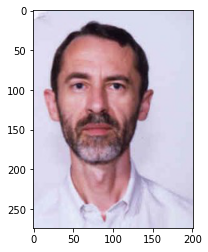

In [ ]:
plt.imshow(img)

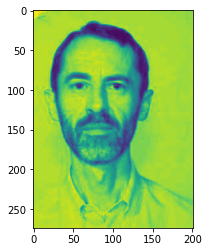

In [ ]:
plt.imshow(img[:,:,0])

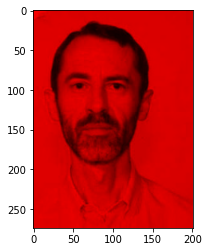

In [ ]:
img2 = img.copy()
img2[:,:,1] = 0
img2[:,:,2] = 0
plt.imshow(img2)

## Efficienza




In [ ]:
# In tempo!
lista = list(np.arange(10000))
np_array = np.arange(10000)


%time lista = [i+2 for i in lista]

CPU times: user 5.25 ms, sys: 1.04 ms, total: 6.29 ms
Wall time: 6.97 ms


In [ ]:
%time np_array += 2

CPU times: user 54 µs, sys: 0 ns, total: 54 µs
Wall time: 59.4 µs


In [ ]:
# In memoria!

!pip install pympler
from pympler.asizeof import asizeof

length = []
length2 = []
for i in range(15):  
    data = list(np.arange(2**i))
    data_np = np.arange(2**i)
    #print('List size: ', asizeof(data), 'Numpy size: ', asizeof(data_np), '\n')
    length.append((asizeof(data),asizeof(data_np)))

     |████████████████████████████████| 184kB 4.9MB/s 
  Created wheel for pympler: filename=Pympler-0.9-cp36-none-any.whl size=164804 sha256=96dc71d08b80dc0c0539c9d8d4badc83c0ac30fd94f0e1d0130a155817a6a452
  Stored in directory: /root/.cache/pip/wheels/23/15/5a/90dd23b3ceffcf8463dc737fba4fad3e295d1da52622bbb74f
Successfully built pympler


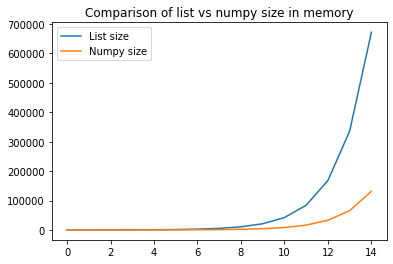

In [ ]:
import matplotlib.pyplot as plt

list_sizes = plt.plot([i[0] for i in length], label = 'List size')
np_sizez = plt.plot([i[1] for i in length], label = 'Numpy size')
plt.legend()
plt.title('Comparison of list vs numpy size in memory')
plt.show()

## Funzioni varie


In [ ]:
Stocks = [[7.558, 7.518, 7.61, 7.55, 7.392, 7.555, 7.495, 7.663, 7.612, 7.671, 7.59, 7.627, 7.575, 7.401, 7.42, 7.25, 7.362, 7.431, 7.363, 7.32, 7.465, 7.488, 7.431, 7.442, 7.459],
[7.809, 7.774, 7.666, 7.696, 7.623, 7.75, 7.542, 7.654, 7.609, 7.597, 7.475, 7.607, 7.674, 7.633, 7.413, 6.97, 7.083, 6.969, 6.82, 6.677, 6.855, 6.687, 6.685, 6.484, 6.472],
[163.05, 162.85, 165.4, 161.85, 160.7, 162.6, 161.25, 160.8, 160.05, 162.1, 161.65, 162.35, 160.7, 160.55, 159.9, 154.8, 156.35, 156.45, 157.05, 154.9, 157.2, 156.25, 157.05, 157, 155],
[1.8012, 1.804, 1.7892, 1.7758, 1.7706, 1.7938, 1.7604, 1.7934, 1.8004, 1.776, 1.7768, 1.7706, 1.7546, 1.7404, 1.72, 1.632, 1.6424, 1.6132, 1.608, 1.5806, 1.6242, 1.6124, 1.6054, 1.5854, 1.5858]]

In [ ]:
Stocks_Mean = [sum(st)/len(st) for st in Stocks]
Stocks_Std = [(sum([(st - stm[1])**2 for st in stm[0]])/(len(stm[0])-1))**0.5 for stm in zip(Stocks,Stocks_Mean)]
Correlations = [[sum([(Stocks[i][k]-Stocks_Mean[i])*(Stocks[j][k]-Stocks_Mean[i]) for k in range(len(Stocks[0]))])/(len(Stocks[0])-1)/Stocks_Std[i]/Stocks_Std[j] for i in range(len(Stocks))] for j in range(len(Stocks))]

print("Means: ")
print(*Stocks_Mean)
print("Stds: ")
print(*Stocks_Std)
print("Corrs: ")
print(*Correlations, sep = "\n")

Means: 
7.48992 7.28896 159.514 1.7086639999999997
Stds: 
0.1105893002660444 0.4574306395509597 3.0228132592007726 0.08600615714393164
Corrs: 
[1.0, 0.5993757160950576, 0.7351169431061391, 0.7061394458303392]
[0.5993757160950574, 1.0, 0.8969716285721261, 0.9736195146995797]
[0.7351169431019833, 0.8969716285710602, 0.9999999999999999, 0.926091322244972]
[0.7061394458299503, 0.9736195146995792, 0.9260913222505305, 1.0000000000000002]


In [ ]:
Stocks_Mean = np.mean(Stocks) #ahiahiahi errore!
Stocks_Std = np.std(Stocks) 
Correlations = np.corrcoef(Stocks)

print("Means: ")
print(Stocks_Mean)
print("Stds: ")
print(Stocks_Std)
print("Corrs: ")
print(Correlations)

Means: 
44.000386
Stds: 
66.74900619972858
Corrs: 
[[1.         0.59937572 0.73511694 0.70613945]
 [0.59937572 1.         0.89697163 0.97361951]
 [0.73511694 0.89697163 1.         0.92609132]
 [0.70613945 0.97361951 0.92609132 1.        ]]


In [ ]:
Stocks_Mean = np.mean(Stocks, axis = 1) 
Stocks_Std = np.std(Stocks, axis = 1) 
Correlations = np.corrcoef(Stocks)

print("Means: ")
print(Stocks_Mean)
print("Stds: ")
print(Stocks_Std)
print("Corrs: ")
print(Correlations)

Means: 
[  7.48992    7.28896  159.514      1.708664]
Stds: 
[0.10835494 0.44818866 2.96174003 0.08426848]
Corrs: 
[[1.         0.59937572 0.73511694 0.70613945]
 [0.59937572 1.         0.89697163 0.97361951]
 [0.73511694 0.89697163 1.         0.92609132]
 [0.70613945 0.97361951 0.92609132 1.        ]]


In [ ]:
s = np.array(Stocks)

In [ ]:
%timeit Stocks_Std = [(sum([(st - stm[1])**2 for st in stm[0]])/(len(stm[0])-1))**0.5 for stm in zip(Stocks,Stocks_Mean)]
%timeit Stocks_Std = np.std(Stocks, axis = 1) 
%timeit Stocks_Std = np.std(s, axis = 1) 

10000 loops, best of 3: 88.5 µs per loop
10000 loops, best of 3: 31.2 µs per loop
10000 loops, best of 3: 21.1 µs per loop


## Esempio statistico

In [ ]:
n = 1000

e = np.random.normal(loc = 0, scale = 1, size = (n,))  # Array con valori random
#print(e)     

f = np.random.multivariate_normal(np.zeros(n), cov = np.eye(n))
#print(f)

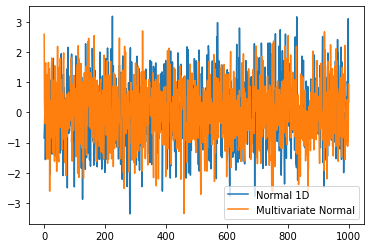

In [ ]:
plt.plot(e, '.', label = 'Normal 1D') 
plt.plot(f, '.', label = 'Multivariate Normal')
# ci interessa davvero vedere questo?
plt.legend()
plt.show()

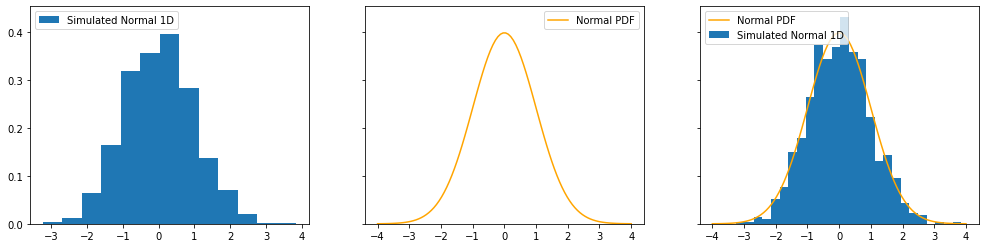

In [ ]:
from scipy.stats import norm

n_bins = 13
x = np.linspace(-4, 4, 100)

fig, axs = plt.subplots(1, 3, sharey=True, figsize = (17,4))
axs[0].hist(e, density = True, label = 'Simulated Normal 1D', bins = n_bins)
axs[0].legend(loc = 'upper left')
#plt.hist(f, density = True)

axs[1].plot(x, norm.pdf(x, 0,1), 'orange', label = 'Normal PDF' )
axs[1].legend(loc = 'best')

axs[2].hist(e, density = True, label = 'Simulated Normal 1D', bins = n_bins*2)
axs[2].plot(x, norm.pdf(x, 0,1), 'orange', label = 'Normal PDF' )
axs[2].legend(loc = 2)

plt.savefig('plotinutile.png')
plt.show()

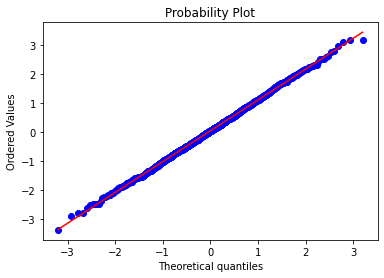

In [ ]:
from scipy.stats import probplot
 
probplot(e, dist="norm", plot=plt)
plt.show()

In [ ]:
from scipy.stats import shapiro

shapiro(e)[1]

0.9508949518203735

In [ ]:
from scipy.stats import bartlett, ttest_ind

bartlett(e,f)

BartlettResult(statistic=4.0697586230566385, pvalue=0.04365751243596305)

In [ ]:
bartlett?

In [ ]:
ttest_ind(e, f, equal_var=True)

Ttest_indResult(statistic=0.6939468802563649, pvalue=0.48779619370444727)

## Esempio calcolistico



In [ ]:
from scipy.integrate import odeint # per codice nuovo meglio solve_ivp

def SIR(z, t, beta, gamma):

    S, I, R = z

    beta = beta[int(t)]
    gamma = gamma [int(t)]
    dS = - beta * I * S / N 
    dI = beta * I * S / N - gamma * I
    dR = gamma * I 

    return [dS, dI, dR]

def plot_traj(trajectories, width = 1.):
    x1 = trajectories[:,0]
    x2 = trajectories[:,1]
    x3 = trajectories[:,2]
    s = plt.plot(x1, linewidth = width, label = 'Susceptible')
    i = plt.plot(x2, linewidth = width, label = 'Infected')
    r = plt.plot(x3, linewidth = width, label = 'Removed')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    if len(beta)==1:
        plt.title('Simulation with R0 = %f' %R0 )
    else:
        plt.title('Simulation with varying R0')



In [ ]:
data_size = 100
N = 10000
infected_0 = 100

beta = 0.3 
beta = 0.1 

beta = 0.3 * np.random.random(100)
gamma = 0.1 * np.random.random(100)

beta = 0.2 * np.concatenate((1.2 * np.ones(20), 0.3 * np.ones(30), 1.2 * np.ones(20), 0.1 * np.ones(30)))

R0 = beta/gamma

In [ ]:
t_grid = np.linspace(0, data_size-1, data_size)
z0 = [N - infected_0, infected_0, 0] # condizioni iniziali
true_y = odeint(SIR, z0, t_grid, args=(beta, gamma)) 

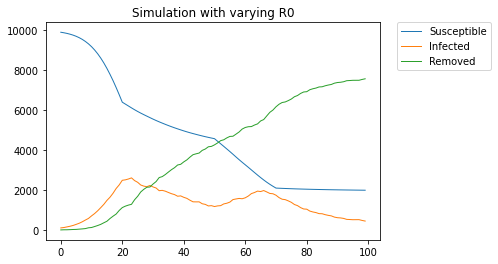

In [ ]:
plot_traj(true_y, 1)

# Pandas 


### Import e Basi

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv?

In [ ]:
data = pd.read_csv('edp-trolleys.csv', header = 0)

#/rtrolliesgonewild

FileNotFoundError: ignored

In [ ]:
data.head(3)

,River,Total number of trolleys,Survey 2006,Survey 2007,Survey 2008,Survey 2009,Survey 2010
0,Avon (New Cut),8,19,11,13,22,6
1,Avon (Temple Meads-Conham),8,13,11,0,8,1
2,Begbrook,0,1,0,0,0,0


In [ ]:
data.tail(3)

,River,Total number of trolleys,Survey 2006,Survey 2007,Survey 2008,Survey 2009,Survey 2010
14,Malago,20,4,8,3,1,3
15,Pigeonhouse stream,15,2,5,17,1,4
16,Trym,1,2,0,2,0,1


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.drop(columns = 'Total number of trolleys', inplace = False)

#data.drop(index = 1, inplace = False) # nope, index toglie righe

data.drop(data.columns[1], axis = 1, inplace = True) # oks

In [ ]:
data.describe()

,Survey 2006,Survey 2007,Survey 2008,Survey 2009,Survey 2010
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,9.470588,6.823529,8.588235,6.352941,2.941176
std,17.713405,12.166734,21.201588,15.479588,4.205214
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,1.000000,0.000000,1.000000
75%,4.000000,8.000000,3.000000,2.000000,4.000000
max,58.000000,48.000000,87.000000,62.000000,14.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   River        17 non-null     object
 1   Survey 2006  17 non-null     int64 
 2   Survey 2007  17 non-null     int64 
 3   Survey 2008  17 non-null     int64 
 4   Survey 2009  17 non-null     int64 
 5   Survey 2010  17 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 944.0+ bytes


In [ ]:
# Piccola chicca tutta da scoprire

!pip install dtale
import dtale

a = dtale.show(data)
d.open_browser()

https://towardsdatascience.com/introduction-to-d-tale-5eddd81abe3f

### Series

In [ ]:
y_2006 = data['Survey 2006']
print(y_2006)
type(y_2006)

0     19
1     13
2      1
3      0
4     58
5      2
6      2
7      0
8      2
9      0
10    51
11     2
12     0
13     3
14     4
15     2
16     2
Name: Survey 2006, dtype: int64


pandas.core.series.Series

In [ ]:
y_2006.index

RangeIndex(start=0, stop=17, step=1)

In [ ]:
print(y_2006.values)
type(y_2006.values)

[19 13  1  0 58  2  2  0  2  0 51  2  0  3  4  2  2]


numpy.ndarray

In [ ]:
y_2006[10]

51

In [ ]:
data = data.set_index('River')
data

,Survey 2006,Survey 2007,Survey 2008,Survey 2009,Survey 2010
River,,,,,
Avon (New Cut),19,11,13,22,6
Avon (Temple Meads-Conham),13,11,0,8,1
Begbrook,1,0,0,0,0
Boiling Wells,0,0,0,0,0
Brislington Brook,58,22,20,11,9
Colliters Brook,2,0,0,0,3
Coombe Brook,2,0,0,0,0
Cranbrook,0,0,0,0,0
Fishponds Brook,2,3,0,0,0


In [ ]:
y_2006 = data['Survey 2006'] # indice diverso da un intero
print(y_2006)
type(y_2006)

River
Avon (New Cut)                19
Avon (Temple Meads-Conham)    13
Begbrook                       1
Boiling Wells                  0
Brislington Brook             58
Colliters Brook                2
Coombe Brook                   2
Cranbrook                      0
Fishponds Brook                2
Floating Harbour               0
Frome                         51
Hazel Brook                    2
Henry Sleed Stream             0
Horfield Brook                 3
Malago                         4
Pigeonhouse stream             2
Trym                           2
Name: Survey 2006, dtype: int64


pandas.core.series.Series

In [ ]:
print('à la Numpy: ', y_2006[-1], '\nBy name: ', y_2006['Trym'])

à la Numpy:  2 
By name:  2


In [ ]:
y_2006 * 1000  # ma stesso behavior di numpy array

River
Avon (New Cut)                19000
Avon (Temple Meads-Conham)    13000
Begbrook                       1000
Boiling Wells                     0
Brislington Brook             58000
Colliters Brook                2000
Coombe Brook                   2000
Cranbrook                         0
Fishponds Brook                2000
Floating Harbour                  0
Frome                         51000
Hazel Brook                    2000
Henry Sleed Stream                0
Horfield Brook                 3000
Malago                         4000
Pigeonhouse stream             2000
Trym                           2000
Name: Survey 2006, dtype: int64

In [ ]:
y_2006.mean()

9.470588235294118

In [ ]:
y_2006[y_2006 >10]

River
Avon (New Cut)                19
Avon (Temple Meads-Conham)    13
Brislington Brook             58
Frome                         51
Name: Survey 2006, dtype: int64

In [ ]:
y_2006.value_counts()  # in più, ha le funzioni di pandas

2     6
0     4
58    1
19    1
51    1
13    1
4     1
3     1
1     1
Name: Survey 2006, dtype: int64

### Indexing

In [ ]:
data[2:8] #ma così solo un asse alla volta

,Survey 2006,Survey 2007,Survey 2008,Survey 2009,Survey 2010
River,,,,,
Begbrook,1,0,0,0,0
Boiling Wells,0,0,0,0,0
Brislington Brook,58,22,20,11,9
Colliters Brook,2,0,0,0,3
Coombe Brook,2,0,0,0,0
Cranbrook,0,0,0,0,0


In [ ]:
print(type(data.loc['Begbrook']))
data.loc['Begbrook'] 

<class 'pandas.core.series.Series'>


Survey 2006    1
Survey 2007    0
Survey 2008    0
Survey 2009    0
Survey 2010    0
Name: Begbrook, dtype: int64

In [ ]:
print(type(data.loc['Begbrook','Survey 2006']))
data.loc['Begbrook','Survey 2006']

<class 'numpy.int64'>


1

In [ ]:
data.loc['Begbrook':'Cranbrook', :]
data.loc['Begbrook':'Cranbrook', 'Survey 2008']

River
Begbrook              0
Boiling Wells         0
Brislington Brook    20
Colliters Brook       0
Coombe Brook          0
Cranbrook             0
Name: Survey 2008, dtype: int64

In [ ]:
data.iloc[2:8,1:3]

,Survey 2007,Survey 2008
River,,
Begbrook,0,0
Boiling Wells,0,0
Brislington Brook,22,20
Colliters Brook,0,0
Coombe Brook,0,0
Cranbrook,0,0


In [ ]:
data['Survey 2006'] > data['Survey 2006'].mean() # boolean indexing

River
Avon (New Cut)                 True
Avon (Temple Meads-Conham)     True
Begbrook                      False
Boiling Wells                 False
Brislington Brook              True
Colliters Brook               False
Coombe Brook                  False
Cranbrook                     False
Fishponds Brook               False
Floating Harbour              False
Frome                          True
Hazel Brook                   False
Henry Sleed Stream            False
Horfield Brook                False
Malago                        False
Pigeonhouse stream            False
Trym                          False
Name: Survey 2006, dtype: bool

In [ ]:
data[data['Survey 2006'] > data['Survey 2006'].mean()]

,Survey 2006,Survey 2007,Survey 2008,Survey 2009,Survey 2010
River,,,,,
Avon (New Cut),19,11,13,22,6
Avon (Temple Meads-Conham),13,11,0,8,1
Brislington Brook,58,22,20,11,9
Frome,51,48,87,62,14


### Other Methods and Transposing

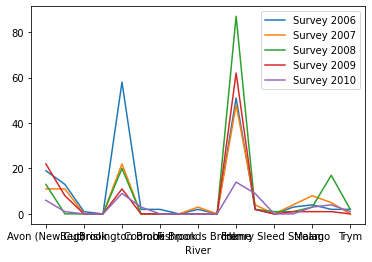

In [ ]:
data.plot() #  ci interessa davvero questo?

In [ ]:
data_t = data.transpose()
data_t.head()

River,Avon (New Cut),Avon (Temple Meads-Conham),Begbrook,Boiling Wells,Brislington Brook,Colliters Brook,Coombe Brook,Cranbrook,Fishponds Brook,Floating Harbour,Frome,Hazel Brook,Henry Sleed Stream,Horfield Brook,Malago,Pigeonhouse stream,Trym
Survey 2006,19,13,1,0,58,2,2,0,2,0,51,2,0,3,4,2,2
Survey 2007,11,11,0,0,22,0,0,0,3,0,48,4,0,4,8,5,0
Survey 2008,13,0,0,0,20,0,0,0,0,0,87,2,1,1,3,17,2
Survey 2009,22,8,0,0,11,0,0,0,0,0,62,2,0,1,1,1,0
Survey 2010,6,1,0,0,9,3,0,0,0,0,14,9,0,0,3,4,1


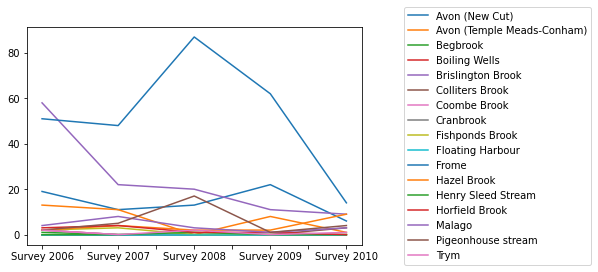

In [ ]:
data_t.plot()
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))

In [ ]:
(data_t==0).all()

River
Avon (New Cut)                False
Avon (Temple Meads-Conham)    False
Begbrook                      False
Boiling Wells                  True
Brislington Brook             False
Colliters Brook               False
Coombe Brook                  False
Cranbrook                      True
Fishponds Brook               False
Floating Harbour               True
Frome                         False
Hazel Brook                   False
Henry Sleed Stream            False
Horfield Brook                False
Malago                        False
Pigeonhouse stream            False
Trym                          False
dtype: bool

In [ ]:
data_no0 = data_t.loc[:,-(data_t==0).all()]

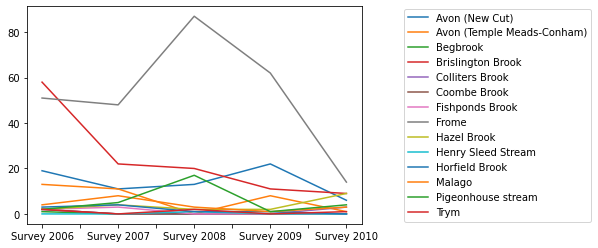

In [ ]:
data_no0.plot()
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))

In [ ]:
data_norm = (data_no0-data_no0.min())/(data_no0.max()-data_no0.min())

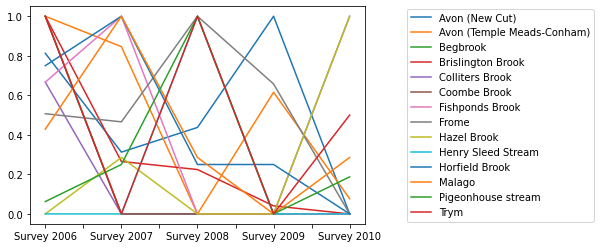

In [ ]:
data_norm.plot()
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))

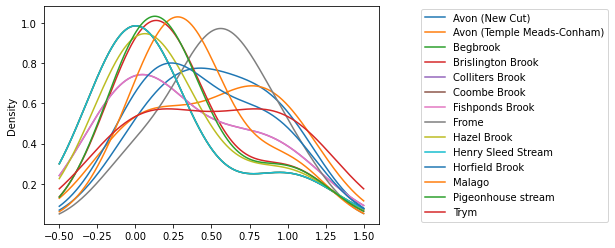

In [ ]:
data_norm.plot(kind = 'kde')
plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))

## Esempione Finale

### Descrizione  Dataset e semplici queries






In [ ]:
pd.set_option('max_columns', None)
df = pd.read_csv('pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [ ]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [ ]:
df[df['weight_kg'].isna()].name

# select name
# from df
# where weight_kg is None 

18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object

In [ ]:
df[df['base_happiness']==140].name

34     Clefairy
35     Clefable
112     Chansey
172      Cleffa
241     Blissey
427     Lopunny
439     Happiny
479        Uxie
480     Mesprit
481       Azelf
Name: name, dtype: object

In [ ]:
df[df['base_happiness']==0].name

# select name
# from df
# where base_happiness = 0

149        Mewtwo
248         Lugia
249         Ho-Oh
381        Kyogre
382       Groudon
383      Rayquaza
385        Deoxys
426       Buneary
482        Dialga
483        Palkia
485     Regigigas
486      Giratina
490       Darkrai
492        Arceus
642      Reshiram
643        Zekrom
645        Kyurem
648      Genesect
715       Xerneas
716       Yveltal
717       Zygarde
771    Type: Null
772      Silvally
788        Cosmog
789       Cosmoem
790      Solgaleo
791        Lunala
792      Nihilego
793      Buzzwole
794     Pheromosa
795     Xurkitree
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, dtype: object

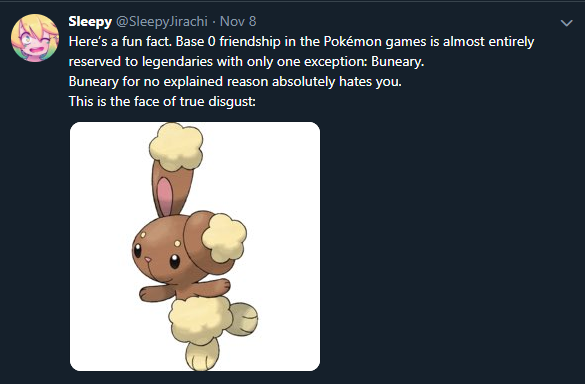

In [ ]:
df.describe(include = 'object')

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
count,801,801,801,801,801,801,417
unique,482,34,588,801,801,18,18
top,['Levitate'],45,Dragon Pokémon,Baivanillaバイバニラ,Makuhita,water,flying
freq,29,250,8,1,1,114,95


In [ ]:
df[df['type2'].isna()].name

df['type2'].fillna('none', inplace = True)

df.describe(include = 'object')

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
count,801,801,801,801,801,801,801
unique,482,34,588,801,801,18,19
top,['Levitate'],45,Dragon Pokémon,Baivanillaバイバニラ,Makuhita,water,none
freq,29,250,8,1,1,114,384


In [ ]:
df['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [ ]:
df.loc[df['capture_rate'] == '30 (Meteorite)255 (Core)', 'capture_rate'] = 255

# meglio di df.loc[df['capture_rate'] == '30 (Meteorite)255 (Core)'] ['capture_rate'] = 255 -> incorrect slicing

In [ ]:
df['capture_rate'] = df['capture_rate'].astype(np.int64)

In [ ]:
df.groupby('is_legendary')[['capture_rate']].aggregate(lambda x: x.sum() / len(x))

,capture_rate
is_legendary,
0,106.709986
1,17.985714


In [ ]:
df.groupby('type1')[['capture_rate']].aggregate(lambda x: x.sum() / len(x))

,capture_rate
type1,
bug,119.833333
dark,84.482759
dragon,37.333333
electric,106.974359
fairy,116.944444
fighting,103.750000
fire,72.403846
flying,79.333333
ghost,93.814815


### Plottini carini

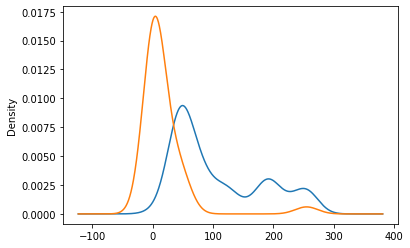

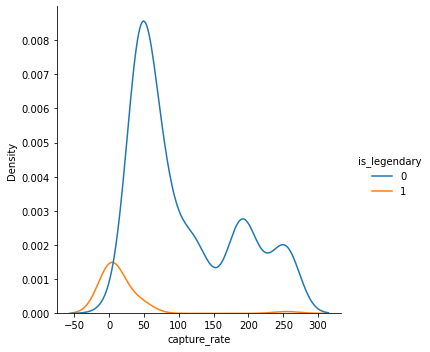

In [ ]:
color = df['is_legendary'].apply(lambda x: 'red' if x else 'green')


df[df['is_legendary'] == 0].capture_rate.plot.density()
df[df['is_legendary'] == 1].capture_rate.plot.density()

# problemi con le densità stimate?

import seaborn as sns
sns.displot(df, x = "capture_rate",  hue = "is_legendary", kind = "kde")

# concettualmente un po' diversi

In [ ]:
df.plot?

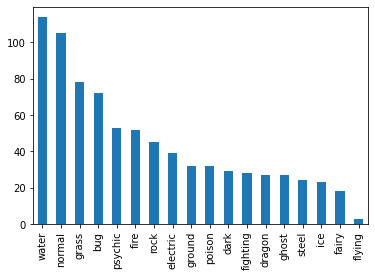

In [ ]:
df['type1'].value_counts().plot.bar()

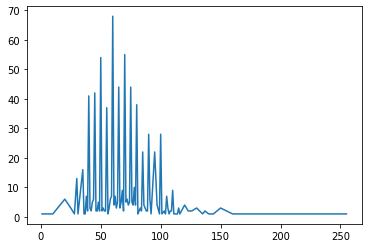

In [ ]:
df['hp'].value_counts().sort_index().plot()

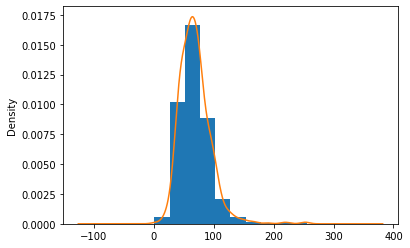

In [ ]:
plt.hist(df['hp'], density = True)
df['hp'].plot.kde()

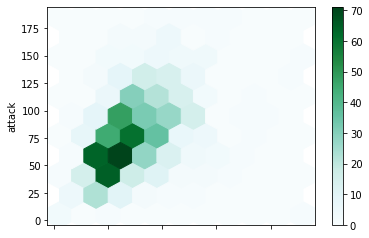

In [ ]:
df.plot.hexbin(x='defense', y='attack', gridsize=10)

In [ ]:
df.plot?

### So I herd u liek ~Mudkips~ Data Science